In [1]:
import re
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import statsmodels.api as sm

sns.set()
sns.set_style("whitegrid")
colors = sns.color_palette("colorblind", 16)

DATA_FOLDER = '../data/raw/'

/opt/miniconda3/envs/ml_project_2/lib/python3.10/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.4
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


# Cryptos

Periods: 2017-11-09 -> 2022-12-13 

### Bitcoin

In [2]:
df = pd.read_csv(DATA_FOLDER+'cryptos/'+'{}.csv'.format('BTC-USD'))
df['date'] = pd.to_datetime(df.date)
df = df[['date','open']]
df.set_index('date', inplace=True)
df.sort_index(inplace=True)
df["log_return"] = np.log(df["open"] / df["open"].shift(1))
df.replace([np.inf, -np.inf], np.nan, inplace=True)
df.dropna(inplace=True)


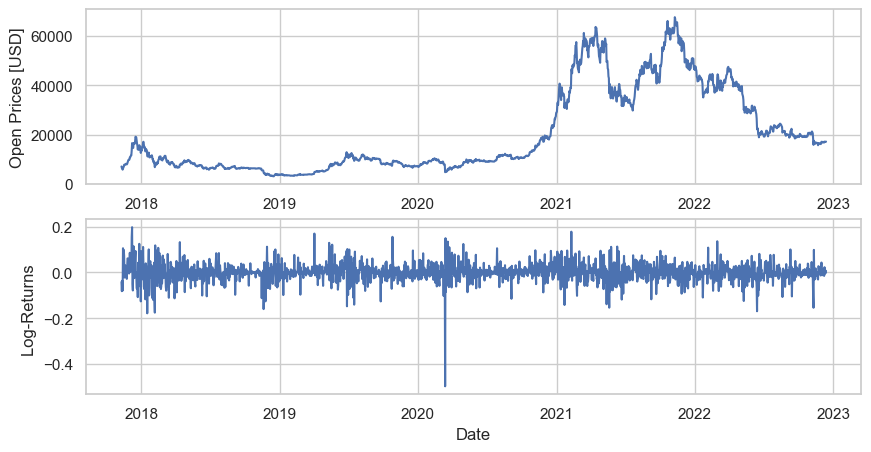

In [3]:
fig, axs = plt.subplots(2, figsize=(10, 5))
axs[0].plot(df.open)
axs[1].plot(df.log_return)
axs[0].set_ylabel('Open Prices [USD]')
axs[1].set_ylabel('Log-Returns ')

plt.xlabel('Date')
plt.show()

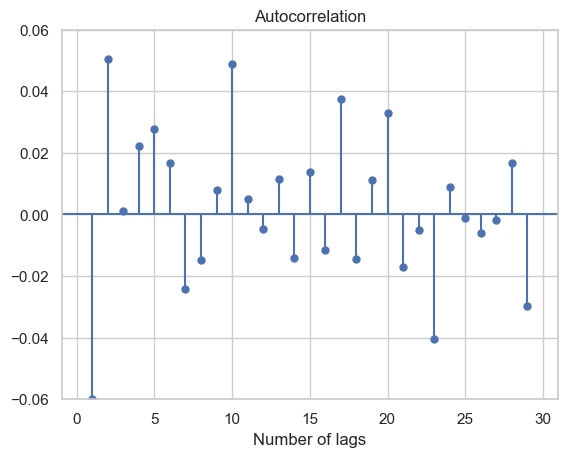

In [4]:
sm.graphics.tsa.plot_acf(df.log_return, lags=np.arange(1, 30), alpha=1)
plt.ylim([-0.06,0.06])
plt.xlabel('Number of lags')
plt.show()

In [5]:
df.groupby(df.index.year).open.count().rename('Count')

date
2017     52
2018    365
2019    365
2020    366
2021    365
2022    347
Name: Count, dtype: int64

In [6]:
print('Number of periods in a year for BTC: {}'.format(365))

Number of periods in a year for BTC: 365


### Ether

In [7]:
df = pd.read_csv(DATA_FOLDER+'cryptos/'+'{}.csv'.format('ETH-USD'))
df['date'] = pd.to_datetime(df.date)
df = df[['date','open']]
df.set_index('date', inplace=True)
df.sort_index(inplace=True)
df["log_return"] = np.log(df["open"] / df["open"].shift(1))
df.replace([np.inf, -np.inf], np.nan, inplace=True)
df.dropna(inplace=True)

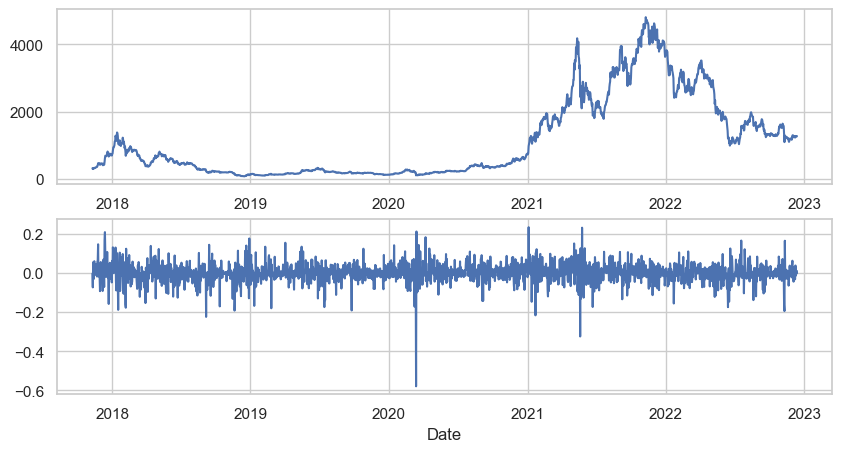

In [8]:
fig, axs = plt.subplots(2, figsize=(10, 5))
axs[0].plot(df.open)
axs[1].plot(df.log_return)

plt.xlabel('Date')
plt.show()

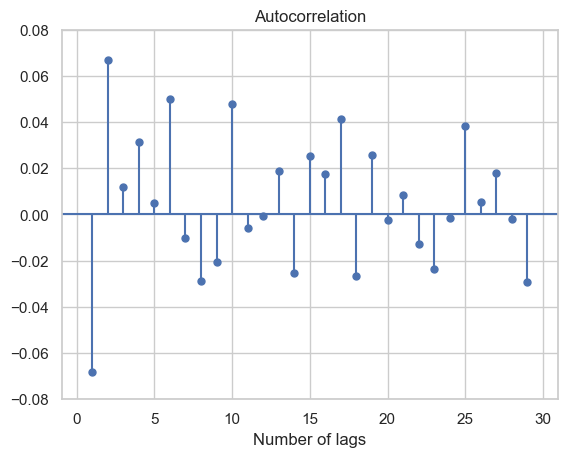

In [9]:
sm.graphics.tsa.plot_acf(df.log_return, lags=np.arange(1, 30), alpha=1)
plt.ylim([-0.08,0.08])
plt.xlabel('Number of lags')
plt.show()

In [10]:
df.groupby(df.index.year).open.count().rename('Count')

date
2017     52
2018    365
2019    365
2020    366
2021    365
2022    347
Name: Count, dtype: int64

In [11]:
print('Number of periods in a year for ETH: {}'.format(365))

Number of periods in a year for ETH: 365


### Ripple

In [12]:
df = pd.read_csv(DATA_FOLDER+'cryptos/'+'{}.csv'.format('XRP-USD'))
df['date'] = pd.to_datetime(df.date)
df = df[['date','open']]
df.set_index('date', inplace=True)
df.sort_index(inplace=True)
df["log_return"] = np.log(df["open"] / df["open"].shift(1))
df.replace([np.inf, -np.inf], np.nan, inplace=True)
df.dropna(inplace=True)

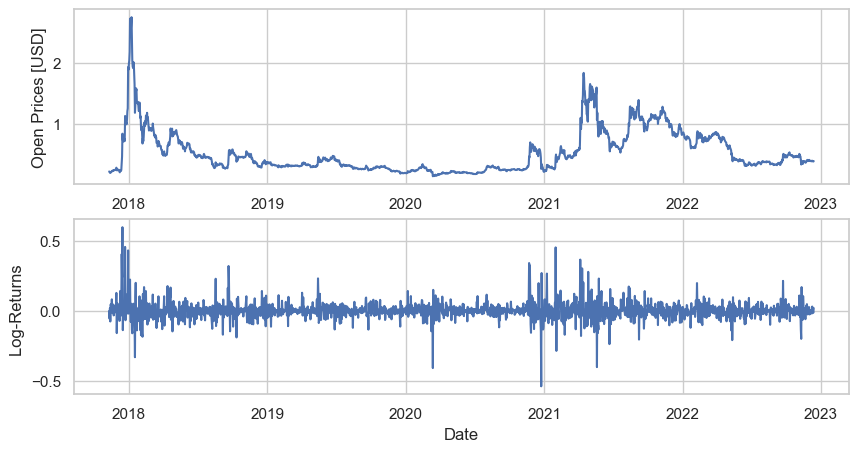

In [13]:
fig, axs = plt.subplots(2, figsize=(10, 5))
axs[0].plot(df.open)
axs[1].plot(df.log_return)
axs[0].set_ylabel('Open Prices [USD]')
axs[1].set_ylabel('Log-Returns ')

plt.xlabel('Date')
plt.show()

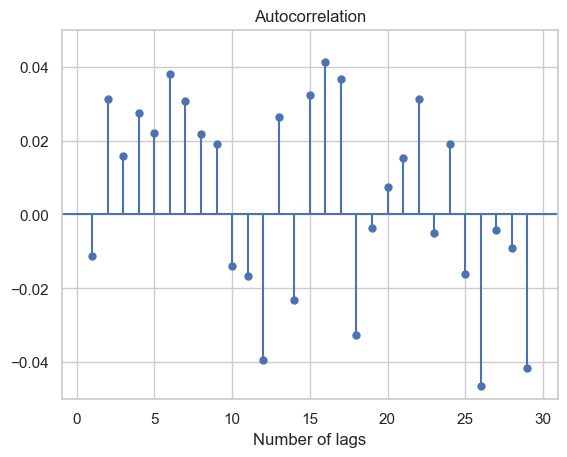

In [14]:
sm.graphics.tsa.plot_acf(df.log_return, lags=np.arange(1, 30), alpha=1)
plt.ylim([-0.05,0.05])
plt.xlabel('Number of lags')
plt.show()

In [15]:
df.groupby(df.index.year).open.count().rename('Count')

date
2017     52
2018    365
2019    365
2020    366
2021    365
2022    347
Name: Count, dtype: int64

In [16]:
print('Number of periods in a year for XRP: {}'.format(365))

Number of periods in a year for XRP: 365


# Commodities

Periods: 2012-12-13 -> 2022-12-09 

### Gold

In [17]:
df = pd.read_csv(DATA_FOLDER+'commodities/'+'{}.csv'.format('LBMA-GOLD'))
df.drop(columns=['USD (PM)', 'GBP (AM)', 'GBP (PM)', 'EURO (AM)', 'EURO (PM)'], inplace=True)
df.rename(columns={'USD (AM)':'Price'}, inplace=True)
df['Date'] = pd.to_datetime(df.Date)
df.set_index('Date', inplace=True)
df.sort_index(inplace=True)
df["log_return"] = np.log(df["Price"] / df["Price"].shift(1))
df.replace([np.inf, -np.inf], np.nan, inplace=True)
df.dropna(inplace=True)

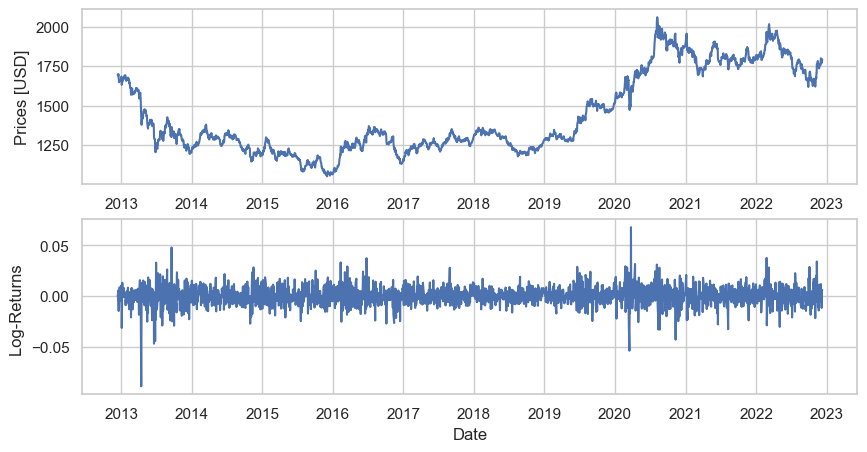

In [18]:
fig, axs = plt.subplots(2, figsize=(10, 5))
axs[0].plot(df.Price)
axs[1].plot(df.log_return)
axs[0].set_ylabel('Prices [USD]')
axs[1].set_ylabel('Log-Returns ')

plt.xlabel('Date')
plt.show()

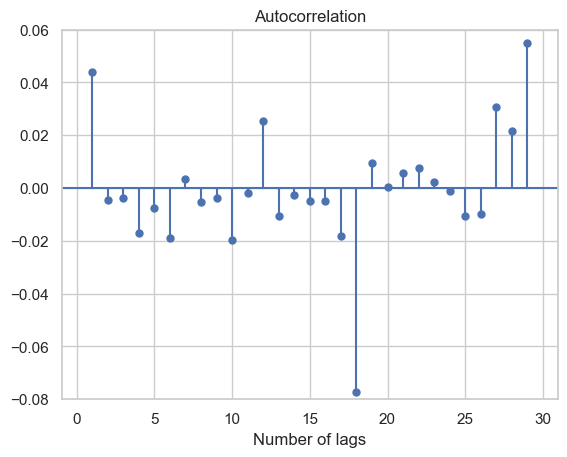

In [19]:
sm.graphics.tsa.plot_acf(df.log_return, lags=np.arange(1, 30), alpha=1)
plt.ylim([-0.08,0.06])
plt.xlabel('Number of lags')
plt.show()

In [20]:
df.groupby(df.index.year).Price.count().rename('Count')

Date
2012     10
2013    253
2014    253
2015    253
2016    253
2017    252
2018    253
2019    253
2020    254
2021    253
2022    237
Name: Count, dtype: int64

In [21]:
print('Number of periods in a year for LBMA-GOLD: {}'.format(252))

Number of periods in a year for LBMA-GOLD: 252


### Natural gas

In [22]:
df = pd.read_csv(DATA_FOLDER+'commodities/'+'{}.csv'.format('NYMEX-NG'))
df = df[['Date','Open']]
df['Date'] = pd.to_datetime(df.Date)
df.set_index('Date', inplace=True)
df.sort_index(inplace=True)
df["log_return"] = np.log(df["Open"] / df["Open"].shift(1))
df.replace([np.inf, -np.inf], np.nan, inplace=True)
df.dropna(inplace=True)

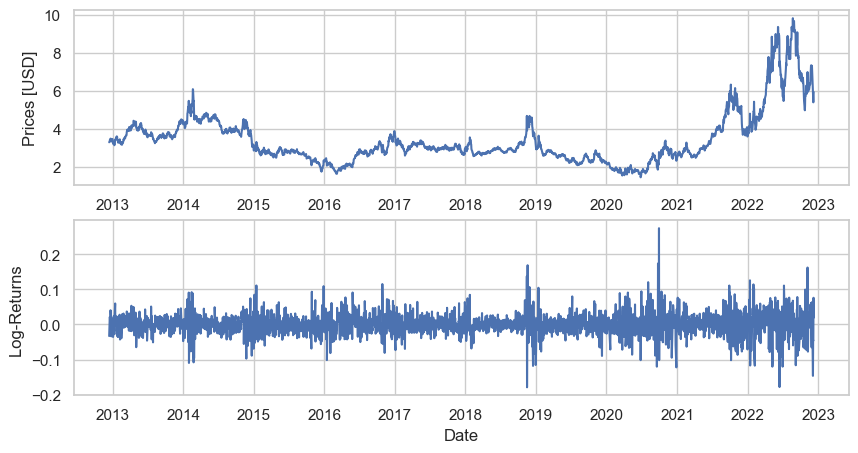

In [23]:
fig, axs = plt.subplots(2, figsize=(10, 5))
axs[0].plot(df.Open)
axs[1].plot(df.log_return)
axs[0].set_ylabel('Prices [USD]')
axs[1].set_ylabel('Log-Returns ')

plt.xlabel('Date')
plt.show()

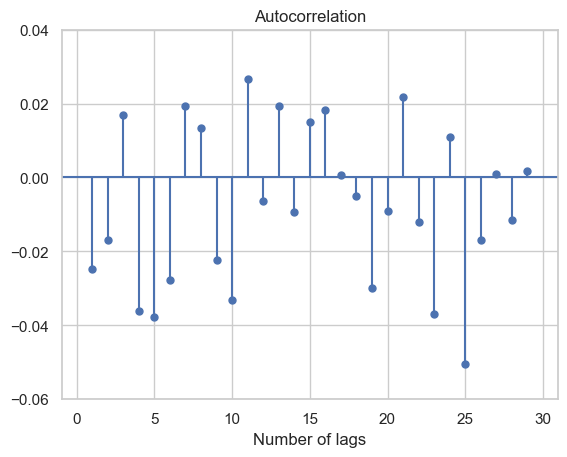

In [24]:
sm.graphics.tsa.plot_acf(df.log_return, lags=np.arange(1, 30), alpha=1)
plt.ylim([-0.06,0.04])
plt.xlabel('Number of lags')
plt.show()

In [25]:
df.groupby(df.index.year).Open.count().rename('Count')

Date
2012     12
2013    261
2014    261
2015    261
2016    252
2017    251
2018    252
2019    252
2020    253
2021    252
2022    237
Name: Count, dtype: int64

In [26]:
print('Number of periods in a year for NYMEX-NG: {}'.format(252))

Number of periods in a year for NYMEX-NG: 252


### Oil

In [27]:
df = pd.read_csv(DATA_FOLDER+'commodities/'+'{}.csv'.format('OPEC-ORB'))
df.rename(columns={'Value':'Price'}, inplace=True)
df['Date'] = pd.to_datetime(df.Date)
df.set_index('Date', inplace=True)
df.sort_index(inplace=True)
df["log_return"] = np.log(df["Price"] / df["Price"].shift(1))
df.replace([np.inf, -np.inf], np.nan, inplace=True)
df.dropna(inplace=True)

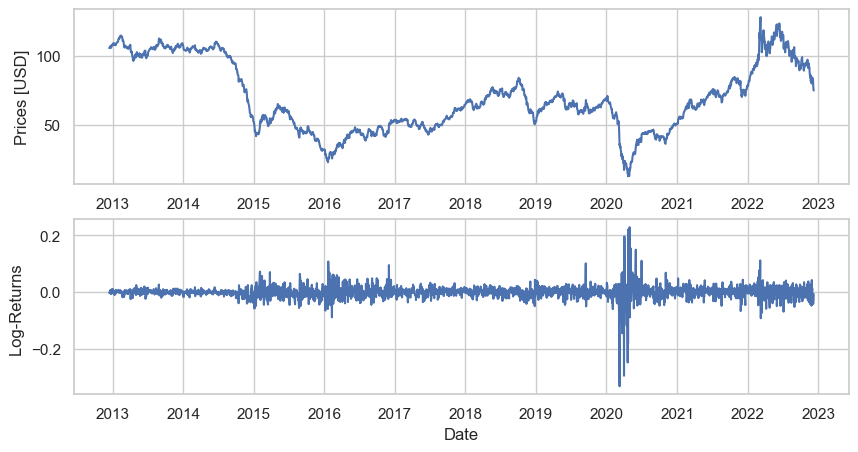

In [28]:
fig, axs = plt.subplots(2, figsize=(10, 5))
axs[0].plot(df.Price)
axs[1].plot(df.log_return)
axs[0].set_ylabel('Prices [USD]')
axs[1].set_ylabel('Log-Returns ')

plt.xlabel('Date')
plt.show()

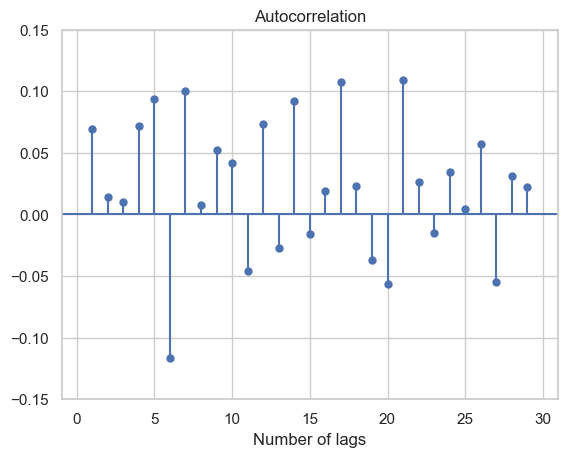

In [29]:
sm.graphics.tsa.plot_acf(df.log_return, lags=np.arange(1, 30), alpha=1)
plt.ylim([-0.15,0.15])
plt.xlabel('Number of lags')
plt.show()

In [30]:
df.groupby(df.index.year).Price.count().rename('Count')

Date
2012     11
2013    257
2014    258
2015    259
2016    259
2017    257
2018    256
2019    258
2020    258
2021    259
2022    244
Name: Count, dtype: int64

In [31]:
print('Number of periods in a year for OPEC-ORB: {}'.format(252))

Number of periods in a year for OPEC-ORB: 252


# Stock market index

Periods: 2012-12-13 -> 2022-12-12 

### S&P 500

In [32]:
df = pd.read_csv(DATA_FOLDER+'stock_market_index/'+'{}.csv'.format('SP500'))
df = df[['Date','Open']]
df['Date'] = pd.to_datetime(df.Date)
df.set_index('Date', inplace=True)
df.sort_index(inplace=True)
df["log_return"] = np.log(df["Open"] / df["Open"].shift(1))
df.replace([np.inf, -np.inf], np.nan, inplace=True)
df.dropna(inplace=True)

/opt/miniconda3/envs/ml_project_2/lib/python3.10/site-packages/pandas/core/arraylike.py:402: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


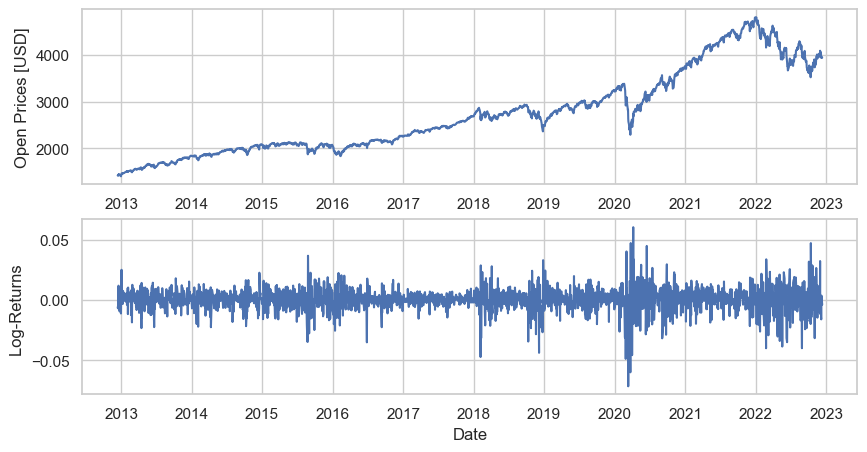

In [33]:
fig, axs = plt.subplots(2, figsize=(10, 5))
axs[0].plot(df.Open)
axs[1].plot(df.log_return)
axs[0].set_ylabel('Open Prices [USD]')
axs[1].set_ylabel('Log-Returns ')

plt.xlabel('Date')
plt.show()

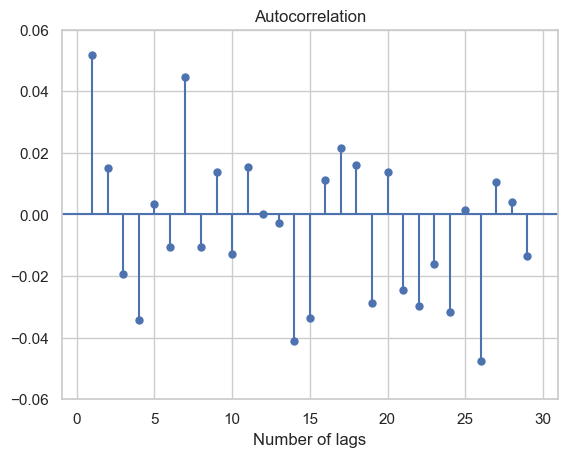

In [34]:
sm.graphics.tsa.plot_acf(df.log_return, lags=np.arange(1, 30), alpha=1)
plt.ylim([-0.06,0.06])
plt.xlabel('Number of lags')
plt.show()

In [35]:
df.groupby(df.index.year).Open.count().rename('Count')

Date
2012     10
2013    243
2014    243
2015    243
2016    252
2017    251
2018    251
2019    252
2020    253
2021    252
2022    238
Name: Count, dtype: int64

In [36]:
print('Number of periods in a year for SP500: {}'.format(252))

Number of periods in a year for SP500: 252


### CAC 40

In [37]:
df = pd.read_csv(DATA_FOLDER+'stock_market_index/'+'{}.csv'.format('CAC40'))
df = df[['Date', 'Open']]
df['Date'] = pd.to_datetime(df.Date)
df.set_index('Date', inplace=True)
df.sort_index(inplace=True)
df["log_return"] = np.log(df["Open"] / df["Open"].shift(1))
df.replace([np.inf, -np.inf], np.nan, inplace=True)
df.dropna(inplace=True)


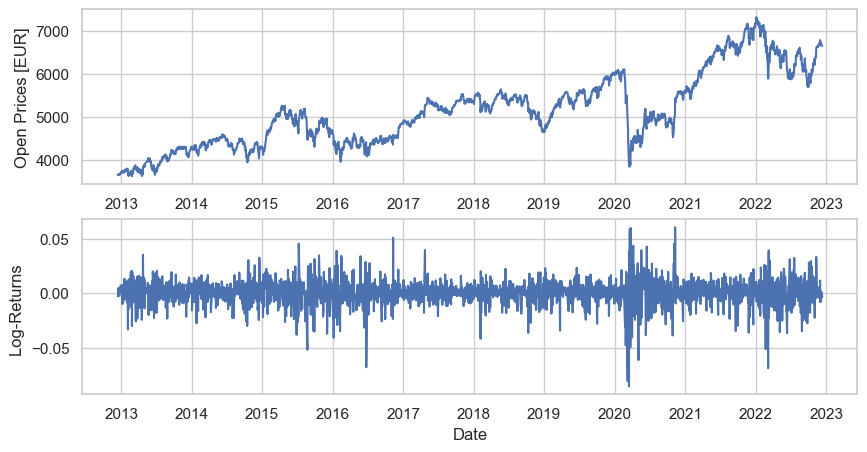

In [38]:
fig, axs = plt.subplots(2, figsize=(10, 5))
axs[0].plot(df.Open)
axs[1].plot(df.log_return)
axs[0].set_ylabel('Open Prices [EUR]')
axs[1].set_ylabel('Log-Returns ')

plt.xlabel('Date')
plt.show()

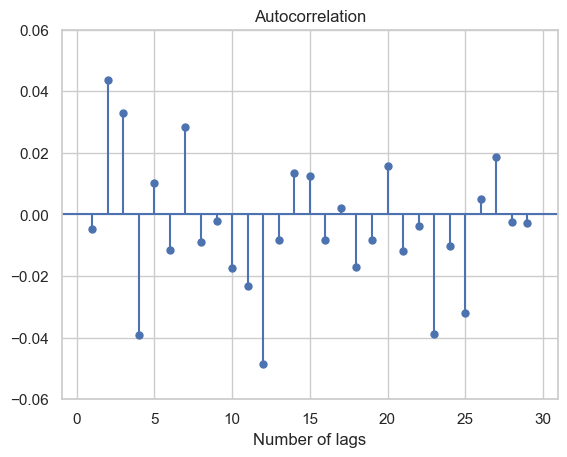

In [39]:
sm.graphics.tsa.plot_acf(df.log_return, lags=np.arange(1, 30), alpha=1)
plt.ylim([-0.06,0.06])
plt.xlabel('Number of lags')
plt.show()

In [40]:
df.groupby(df.index.year).Open.count().rename('Count')

Date
2012      8
2013    255
2014    254
2015    255
2016    257
2017    255
2018    255
2019    254
2020    257
2021    258
2022    244
Name: Count, dtype: int64

In [41]:
print('Number of periods in a year for CAC40: {}'.format(252))

Number of periods in a year for CAC40: 252


### SMI

In [42]:
df = pd.read_csv(DATA_FOLDER+'stock_market_index/'+'{}.csv'.format('SMI'))
df = df[['Date', 'Open']]
df['Date'] = pd.to_datetime(df.Date)
df.set_index('Date', inplace=True)
df.sort_index(inplace=True)
df["log_return"] = np.log(df["Open"] / df["Open"].shift(1))
df.replace([np.inf, -np.inf], np.nan, inplace=True)
df.dropna(inplace=True)

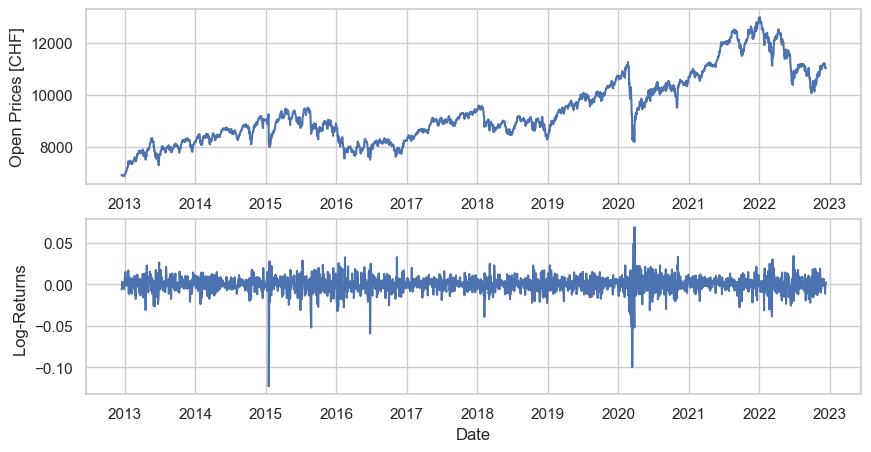

In [43]:
fig, axs = plt.subplots(2, figsize=(10, 5))
axs[0].plot(df.Open)
axs[1].plot(df.log_return)
axs[0].set_ylabel('Open Prices [CHF]')
axs[1].set_ylabel('Log-Returns ')

plt.xlabel('Date')
plt.show()

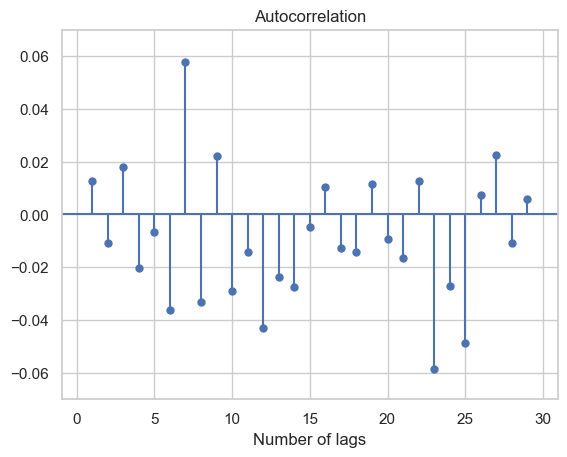

In [44]:
sm.graphics.tsa.plot_acf(df.log_return, lags=np.arange(1, 30), alpha=1)
plt.ylim([-0.07,0.07])
plt.xlabel('Number of lags')
plt.show()

In [45]:
df.groupby(df.index.year).Open.count().rename('Count')

Date
2012      8
2013    249
2014    249
2015    251
2016    254
2017    251
2018    249
2019    249
2020    252
2021    232
2022    241
Name: Count, dtype: int64

In [46]:
print('Number of periods in a year for SMI: {}'.format(252))

Number of periods in a year for SMI: 252
